<a href="https://colab.research.google.com/github/nikhilbordekar/8-Week-SQL-Challenge/blob/main/8_Weeks_SQL_Challenge_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY #5 DATA MART**

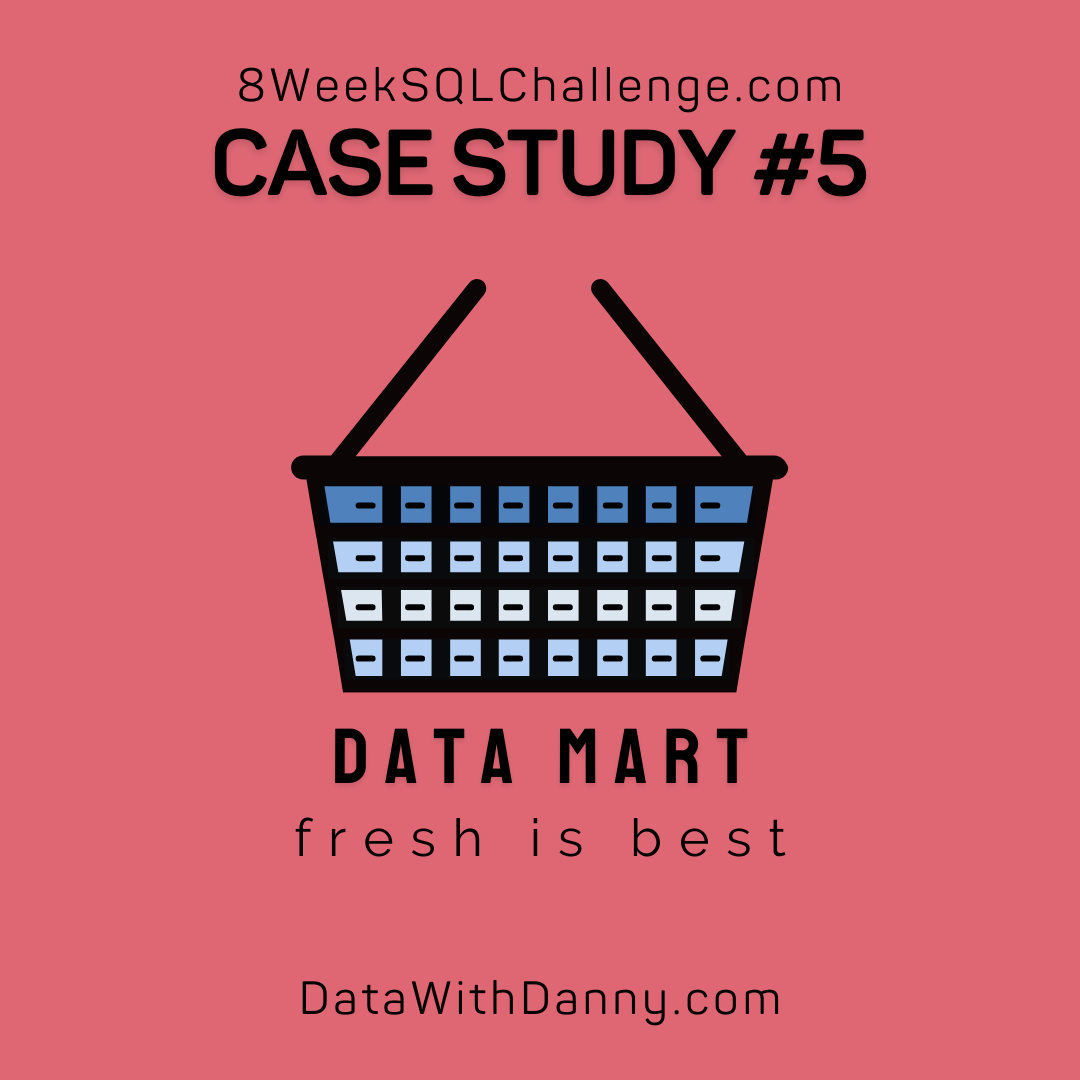

**Introduction**

Data Mart is Danny’s latest venture and after running international operations for his online supermarket that specialises in fresh produce - Danny is asking for your support to analyse his sales performance.

In June 2020 - large scale supply changes were made at Data Mart. All Data Mart products now use sustainable packaging methods in every single step from the farm all the way to the customer.

Danny needs your help to quantify the impact of this change on the sales performance for Data Mart and it’s separate business areas.

The key business question he wants you to help him answer are the following:

1) What was the quantifiable impact of the changes introduced in June 2020?

2) Which platform, region, segment and customer types were the most impacted by this change?

3) What can we do about future introduction of similar sustainability updates to the business to minimise impact on sales?

**Available Data**

For this case study there is only a single table: data_mart.weekly_sales

The Entity Relationship Diagram is shown below with the data types made clear, please note that there is only this one table - hence why it looks a little bit lonely!

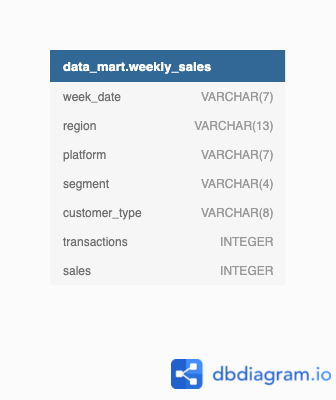

Column Dictionary
The columns are pretty self-explanatory based on the column names but here are some further details about the dataset:

1) Data Mart has international operations using a multi-region strategy

2) Data Mart has both, a retail and online platform in the form of a Shopify store front to serve their customers

3) Customer segment and customer_type data relates to personal age and demographics information that is shared with Data Mart

4) transactions is the count of unique purchases made through Data Mart and sales is the actual dollar amount of purchases


Each record in the dataset is related to a specific aggregated slice of the underlying sales data rolled up into a week_date value which represents the start of the sales week.

# **DATA**

```sql
CREATE SCHEMA data_mart;
SET search_path = data_mart;


DROP TABLE IF EXISTS data_mart.weekly_sales;
CREATE TABLE data_mart.weekly_sales (
  "week_date" VARCHAR(7),
  "region" VARCHAR(13),
  "platform" VARCHAR(7),
  "segment" VARCHAR(4),
  "customer_type" VARCHAR(8),
  "transactions" INTEGER,
  "sales" INTEGER
);

INSERT INTO data_mart.weekly_sales
  ("week_date", "region", "platform", "segment", "customer_type", "transactions", "sales")
VALUES
  ('31/8/20', 'ASIA', 'Retail', 'C3', 'New', '120631', '3656163'),
  ('31/8/20', 'ASIA', 'Retail', 'F1', 'New', '31574', '996575'),
  ('31/8/20', 'USA', 'Retail', 'null', 'Guest', '529151', '16509610'),
  ('31/8/20', 'EUROPE', 'Retail', 'C1', 'New', '4517', '141942'),
  ('31/8/20', 'AFRICA', 'Retail', 'C2', 'New', '58046', '1758388'),
  ('31/8/20', 'CANADA', 'Shopify', 'F2', 'Existing', '1336', '243878'),
  ('31/8/20', 'AFRICA', 'Shopify', 'F3', 'Existing', '2514', '519502'),
  ('31/8/20', 'ASIA', 'Shopify', 'F1', 'Existing', '2158', '371417'),
  ('31/8/20', 'AFRICA', 'Shopify', 'F2', 'New', '318', '49557'),
  ('31/8/20', 'AFRICA', 'Retail', 'C3', 'New', '111032', '3888162'),
  ('31/8/20', 'USA', 'Shopify', 'F1', 'Existing', '1398', '260773'),
  ('31/8/20', 'OCEANIA', 'Shopify', 'C2', 'Existing', '4661', '882690'),
  ('31/8/20', 'SOUTH AMERICA', 'Retail', 'C2', 'Existing', '1029', '38762'),
  ('31/8/20', 'SOUTH AMERICA', 'Shopify', 'C4', 'New', '6', '917')

  Continue
```

# **Case Study Questions**

#**A. Data Cleansing Steps**

In a single query, perform the following operations and generate a new table in the data_mart schema named clean_weekly_sales:



*   Convert the week_date to a DATE format
*   Add a week_number as the second column for each week_date value, for example any value from the 1st of January to 7th of January will be 1, 8th to 14th will be 2 etc


*   Add a month_number with the calendar month for each week_date value as the 3rd column
*   Add a calendar_year column as the 4th column containing either 2018, 2019 or 2020 values


*   Add a new column called age_band after the original segment column using the following mapping on the number inside the segment value

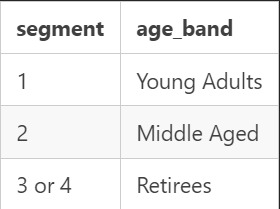

*   Add a new demographic column using the following mapping for the first letter in the segment values:

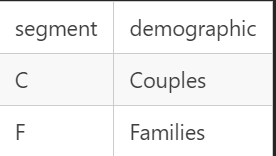




*  Ensure all null string values with an "unknown" string value in the original segment column as well as the new age_band and demographic columns


*   Generate a new avg_transaction column as the sales value divided by transactions rounded to 2 decimal places for each record








#**B. Data Exploration**

**1. What day of the week is used for each week_date value?**

```sql
select distinct(to_char(week_date, 'day')) as week_day
from clean_weekly_sales;
```

**Answer**


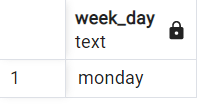

**2. What range of week numbers are missing from the dataset?**

```sql
with week_number_cte as (
  select generate_series(1,52) as week_number
)
  
select distinct week_no.week_number
from week_number_cte as week_no
left join clean_weekly_sales as sales
  on week_no.week_number = sales.week_number
where sales.week_number is null; -- filter to identify the missing week numbers where the values are `null`.

```

**Answer**

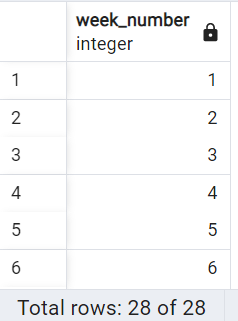

**3. How many total transactions were there for each year in the dataset?**


**4. What is the total sales for each region for each month?**


**5. What is the total count of transactions for each platform**

**6. What is the percentage of sales for Retail vs Shopify for each month?**


**7. What is the percentage of sales by demographic for each year in the dataset?**


**8. Which age_band and demographic values contribute the most to Retail sales?**


**9. Can we use the avg_transaction column to find the average transaction size for each year for Retail vs Shopify? If not - how would you calculate it instead?**